# Кластеризация и уменьшение размерности

Подготовлено на основе [материалов с сайта Коротеева М.В.](https://koroteev.site/ml/)

## Кластеризация

1.1 Загрузите [датасет](https://github.com/koroteevmv/ML_course/blob/main/ML6.1_clustering/data/Mall_Customers.csv). Приведите описательную статистику. Преобразуйте все нечисловые характеристики в числовые. Постройте графическую интерпретацию значений датасета. В качестве x-координаты используйте Annual Income, в качестве y-координаты Spending Score. 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.cm as cm
import seaborn as sns
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 семестр. Машинное обучение/data/Mall_Customers.csv', sep = ',')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Преобразуйте все нечисловые характеристики в числовые. 

In [8]:
gend = np.unique(df['Genre'].values)
val=[i + 1 for i in range(len(gend))]
gen1 = dict(zip(gend, val))

In [9]:
pd.options.mode.chained_assignment = None
for i in range(len(df)):
    a = df['Genre'][i]
    df['Genre'][i] = gen1[a]

In [14]:
df['Genre'] = df['Genre'].astype('int')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Genre                   200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [16]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,2,19,15,39
1,2,2,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,2,32,126,74
198,199,2,32,137,18


Постройте графическую интерпретацию значений датасета. В качестве x-координаты используйте Annual Income, в качестве y-координаты Spending Score.

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

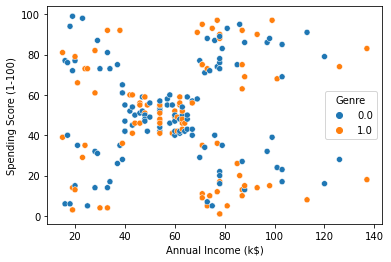

In [ ]:
# взято из методички
sns.scatterplot(x = 'Annual Income (k$)' , y = 'Spending Score (1-100)',data = df , hue='Genre')

1.2 Определите наилучшее число кластеров на основе созданной визуализации. Обучите модель К-средних и предскажите кластер для каждого объекта из датасета.

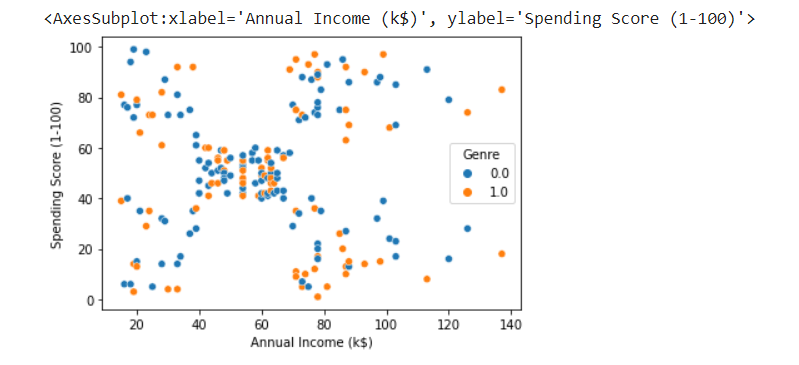

In [17]:
# На мой взгляд, наилучшее число кластеров = 5
X = df.to_numpy()
kmeans = KMeans(n_clusters = 5).fit(X)
predskaz = kmeans.predict(X)

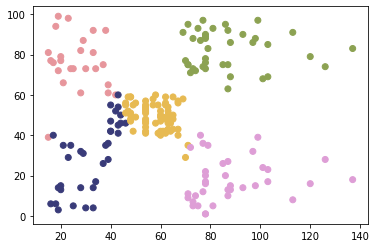

In [18]:
plt.scatter(X[:,3],X[:,4], c = predskaz, cmap = 'tab20b')

1.3 Постройте графическую интерпретацию с центрами кластеров, в качестве x-координаты используйте Возраст, в качестве y-координаты Spending Score. Раскрасьте точки в соответствии с номером из кластера.

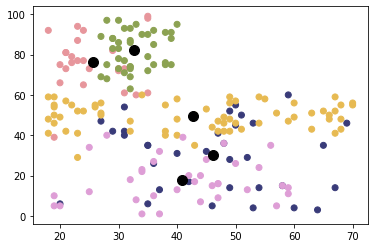

In [19]:
plt.scatter(X[:,2], X[:,4], c = predskaz, cmap = 'tab20b')# x-координаты используйте Возраст, в качестве y-координаты Spending Score
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 4], c = 'black', s = 100)

1.4 Определите наилучшее число кластеров с помощью графической зависимости числа кластеров от суммы квадратов расстояний значений датасета до центра кластера

In [20]:
import warnings
warnings.filterwarnings('ignore')# чтобы убрать ошибку от питона

Метрика теста calinski_harabasz 301.014459322755 при количестве кластеров 2
Метрика теста calinski_harabasz 255.54994396346328 при количестве кластеров 3
Метрика теста calinski_harabasz 260.83382969522137 при количестве кластеров 4
Метрика теста calinski_harabasz 253.85175226888728 при количестве кластеров 5
Метрика теста calinski_harabasz 269.86257123857894 при количестве кластеров 6
Метрика теста calinski_harabasz 266.13244177780706 при количестве кластеров 7
Метрика теста calinski_harabasz 283.17011711624656 при количестве кластеров 8
Метрика теста calinski_harabasz 278.921052185149 при количестве кластеров 9
Метрика теста calinski_harabasz 277.78408022879904 при количестве кластеров 10


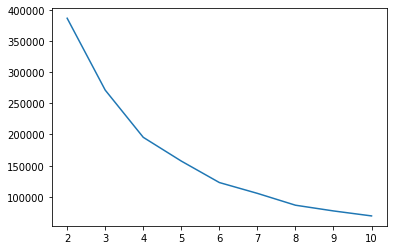

In [29]:
from sklearn.metrics import calinski_harabasz_score
wcss = []
x = df.to_numpy()
for i in range(2, 11):
    k_means = KMeans(n_clusters = i, random_state = 42)
    k_means.fit(x)
    cur_res = k_means.fit_predict(x)
    print(f'Метрика теста calinski_harabasz {calinski_harabasz_score(X, cur_res)} при количестве кластеров {i}')
    wcss.append(k_means.inertia_)
plt.plot(range(2, 11),wcss)
plt.xticks(range(2, 11))
plt.show()

1.5 Используйте другие алгоритмы кластеризации, реализованные в `sklearn`. Визуализируйте результат.

BIRCH

In [22]:
from sklearn.cluster import Birch

In [23]:
brc = Birch(branching_factor = 5, n_clusters = None)
brc.fit(X)

Birch(branching_factor=5, n_clusters=None)

In [36]:
predskaz = brc.predict(X)

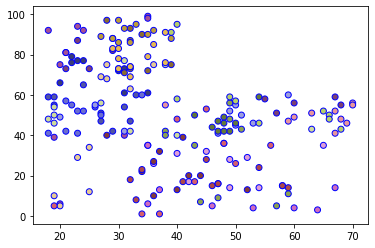

In [25]:
plt.scatter(X[:,2], X[:,4], c = predskaz, cmap = 'tab20b', edgecolors = 'b')

OPTICS

In [37]:
from sklearn.cluster import OPTICS

optics_clustering = OPTICS(min_samples = 5).fit(X)

In [38]:
predskaz = optics_clustering.fit_predict(X)
print(f'Метрика теста calinski_harabasz {calinski_harabasz_score(X, predskaz)}')

Метрика теста calinski_harabasz 8.915051440544177


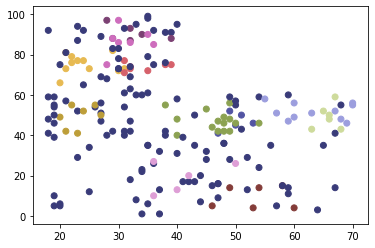

In [39]:
plt.scatter(X[:,2], X[:,4], c = predskaz, cmap = 'tab20b')

## Уменьшение размерности

2.1 Загрузите [датасет](https://raw.githubusercontent.com/k8xu/credit-risk-classification/master/credit_data.csv). Приведите описательную статистику. Преобразуйте все нечисловые характеристики в числовые. Заполните пропуски. Разделите данные на тестовую и обучающую выборки.

In [42]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5 семестр. Машинное обучение/data/credit_data.csv', sep = ',')

In [43]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


Заполните пропуски

In [44]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

### Поскольку Saving accounts и Checking account имеют пропуски, НО они не являются числовыми, то замену на реднее, максимальное значение и прочее невозможно осуществить. Воспользуемся mode(), так бдет логичнее.

In [45]:
sav_acc = df['Saving accounts'].mode()[0]
che_acc = df['Checking account'].mode()[0]
df['Saving accounts'] = df['Saving accounts'].fillna(sav_acc)
df['Checking account'] = df['Checking account'].fillna(che_acc)

In [46]:
df.isna().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

Приведите описательную статистику

In [49]:
df.describe()# тут не все столбцы, поэтому сначала сделаем следующий пункт, а потом вернемся к этому

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,0.690000,1.904000,1.071000,0.373000,0.395000,3271.258000,20.903000,2.878000,0.700000
std,288.819436,11.375469,0.462725,0.653614,0.531264,0.805307,0.604434,2822.736876,12.058814,1.978138,0.458487
min,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,250.000000,4.000000,0.000000,0.000000
25%,249.750000,27.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1365.500000,12.000000,1.000000,0.000000
50%,499.500000,33.000000,1.000000,2.000000,1.000000,0.000000,0.000000,2319.500000,18.000000,3.000000,1.000000
75%,749.250000,42.000000,1.000000,2.000000,1.000000,0.000000,1.000000,3972.250000,24.000000,5.000000,1.000000
max,999.000000,75.000000,1.000000,3.000000,2.000000,3.000000,2.000000,18424.000000,72.000000,7.000000,1.000000


Преобразуйте все нечисловые характеристики в числовые. 

In [48]:
ordinal_encoder = OrdinalEncoder()
name = ['Sex','Housing','Saving accounts','Purpose','Risk','Checking account']
df[name] = ordinal_encoder.fit_transform(df[name])  

In [50]:
df.describe()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,0.690000,1.904000,1.071000,0.373000,0.395000,3271.258000,20.903000,2.878000,0.700000
std,288.819436,11.375469,0.462725,0.653614,0.531264,0.805307,0.604434,2822.736876,12.058814,1.978138,0.458487
min,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,250.000000,4.000000,0.000000,0.000000
25%,249.750000,27.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1365.500000,12.000000,1.000000,0.000000
50%,499.500000,33.000000,1.000000,2.000000,1.000000,0.000000,0.000000,2319.500000,18.000000,3.000000,1.000000
75%,749.250000,42.000000,1.000000,2.000000,1.000000,0.000000,1.000000,3972.250000,24.000000,5.000000,1.000000
max,999.000000,75.000000,1.000000,3.000000,2.000000,3.000000,2.000000,18424.000000,72.000000,7.000000,1.000000


Разделите данные на тестовую и обучающую выборки.обучите модель Random Forest для предсказания переменной Risk

In [51]:
X = df[['Age','Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose']]
Y = df['Risk']

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

2.2 Обучите модель Random Forest для предсказания переменной `Risk`. Оцените полученную модель с помощью метрик.

In [53]:
RFC = RandomForestClassifier()
rfc = RFC.fit(X_train, y_train)

In [54]:
y_pred = RFC.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.50      0.22      0.31        59
         1.0       0.74      0.91      0.81       141

    accuracy                           0.70       200
   macro avg       0.62      0.56      0.56       200
weighted avg       0.67      0.70      0.66       200



2.3 Понизьте размерность данных до 2 с помощью метода главных компонент. Обучите модель Random Forest, используя данные после уменьшения размерности, и оцените ее эффективность с помощью метрик.

In [55]:
X_ = PCA(n_components = 2).fit_transform(X, 2)
X_train, X_test, y_train, y_test = train_test_split(X_, Y, test_size = 0.2, random_state = 42)

In [56]:
RFC = RandomForestClassifier()
rfc = RFC.fit(X_train, y_train)

In [57]:
y_pred = RFC.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.41      0.24      0.30        59
         1.0       0.73      0.86      0.79       141

    accuracy                           0.68       200
   macro avg       0.57      0.55      0.54       200
weighted avg       0.64      0.68      0.64       200



2.4 Постройте график зависимости точности модели от размерности данных.

In [58]:
accuracy = []

In [59]:
for i in range(1, 9):
    X_ = PCA(n_components = i).fit_transform(X, 2)
    X_train, X_test, y_train, y_test = train_test_split(X_, Y, test_size = 0.2)
    RFC = RandomForestClassifier()
    rfc = RFC.fit(X_train, y_train)
    y_pred = RFC.predict(X_test)
    accuracy.append(accuracy_score(y_test,y_pred))

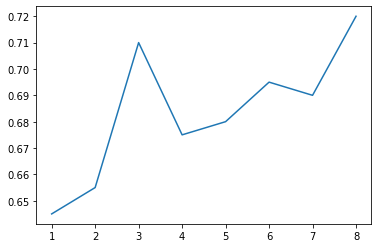

In [60]:
plt.plot([i for i in range(1, 9)], accuracy)

2.5 Используя модель из 2.2, получите прогнозы для всех объектов. Используя метод главных компонент, понизьте размерность данных до 2. Визуализируйте полученные точки на плоскости и раскрасьте их в цвет, соответствующих предсказанному классу.

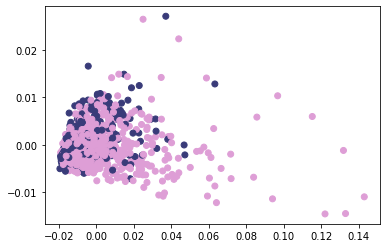

In [61]:
X = df[['Age','Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose']]
Y = df['Risk']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
RFC = RandomForestClassifier()
rfc = RFC.fit(X_train, y_train)

y_pred = RFC.predict(X)

X1 = normalize(X)
X_ = PCA(n_components=2).fit_transform(X1,2)

plt.scatter(X_[:,0] X_[:,1], c = y_pred, cmap = 'tab20b')
plt.show()

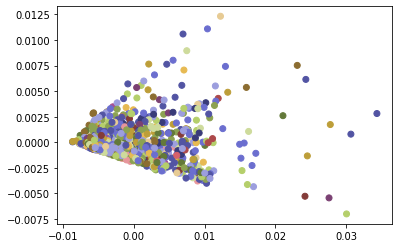

In [63]:
X = df[['Risk','Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose']]
Y = df['Age']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
RFC = RandomForestClassifier()
rfc = RFC.fit(X_train, y_train)

y_pred = RFC.predict(X)

X1 = normalize(X)
X_ = PCA(n_components = 2).fit_transform(X1, 2)

plt.scatter(X_[:,0], X_[:,1], c = y_pred, cmap = 'tab20b')
plt.show()

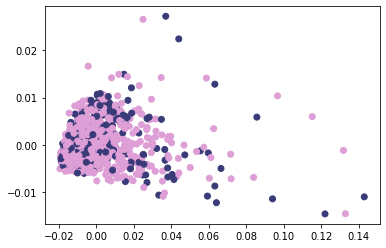

In [64]:
X = df[['Risk','Age', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose']]
Y = df['Sex']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
RFC = RandomForestClassifier()
rfc = RFC.fit(X_train, y_train)

y_pred = RFC.predict(X)

X1 = normalize(X)
X_ = PCA(n_components=2).fit_transform(X1,2)

plt.scatter(X_[:,0], X_[:,1], c = y_pred, cmap = 'tab20b')
plt.show()

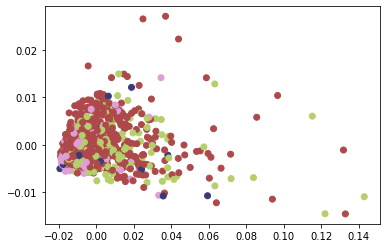

In [65]:
X = df[['Risk','Sex', 'Age', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose']]
Y = df['Job']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
RFC = RandomForestClassifier()
rfc = RFC.fit(X_train, y_train)

y_pred = RFC.predict(X)

X1 = normalize(X)
X_ = PCA(n_components=2).fit_transform(X1, 2)

plt.scatter(X_[:,0], X_[:,1], c = y_pred, cmap = 'tab20b')
plt.show()

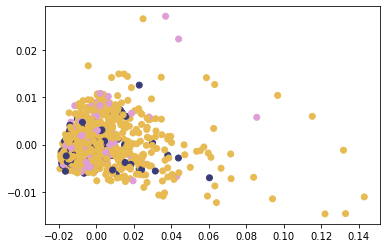

In [66]:
X = df[['Risk','Sex', 'Job', 'Age', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose']]
Y = df['Housing']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
RFC = RandomForestClassifier()
rfc = RFC.fit(X_train, y_train)

y_pred = RFC.predict(X)

X1 = normalize(X)
X_ = PCA(n_components = 2).fit_transform(X1, 2)

plt.scatter(X_[:,0], X_[:,1], c = y_pred, cmap = 'tab20b')
plt.show()

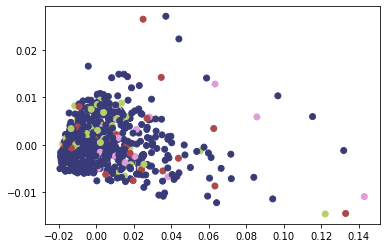

In [67]:
X = df[['Risk','Sex', 'Job', 'Age', 'Housing', 'Checking account', 'Credit amount', 'Duration', 'Purpose']]
Y = df['Saving accounts']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
RFC = RandomForestClassifier()
rfc = RFC.fit(X_train, y_train)

y_pred = RFC.predict(X)

X1 = normalize(X)
X_ = PCA(n_components = 2).fit_transform(X1, 2)

plt.scatter(X_[:,0], X_[:,1], c = y_pred, cmap = 'tab20b')
plt.show()

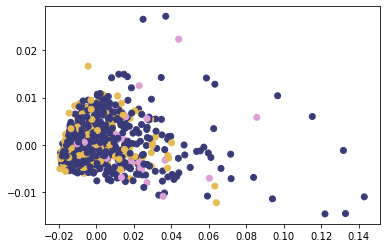

In [68]:
X = df[['Risk','Sex', 'Job', 'Age', 'Housing', 'Saving accounts', 'Credit amount', 'Duration', 'Purpose']]
Y = df['Checking account']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
RFC = RandomForestClassifier()
rfc = RFC.fit(X_train, y_train)

y_pred = RFC.predict(X)

X1 = normalize(X)
X_ = PCA(n_components = 2).fit_transform(X1, 2)

plt.scatter(X_[:,0],X_[:,1], c = y_pred, cmap = 'tab20b')
plt.show()

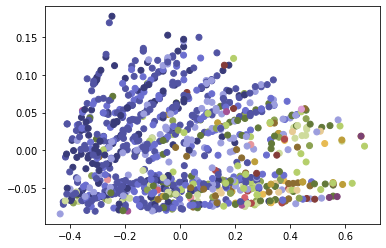

In [ ]:
X = df[['Risk','Sex', 'Job', 'Age', 'Housing', 'Saving accounts', 'Checking account', 'Duration', 'Purpose']]
Y = df['Credit amount']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
RFC = RandomForestClassifier()
rfc = RFC.fit(X_train, y_train)

y_pred = RFC.predict(X)

X1 = normalize(X)
X_ = PCA(n_components = 2).fit_transform(X1, 2)

plt.scatter(X_[:,0], X_[:,1], c = y_pred, cmap = 'tab20b')
plt.show()

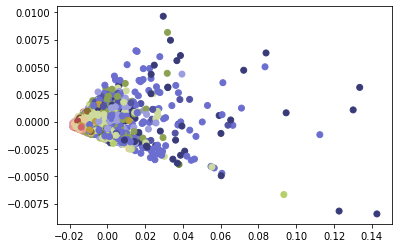

In [69]:
X = df[['Risk','Sex', 'Job', 'Age', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Purpose']]
Y = df['Duration']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
RFC = RandomForestClassifier()
rfc = RFC.fit(X_train, y_train)

y_pred = RFC.predict(X)

X1 = normalize(X)
X_ = PCA(n_components = 2).fit_transform(X1, 2)

plt.scatter(X_[:,0], X_[:,1], c = y_pred, cmap = 'tab20b')
plt.show()

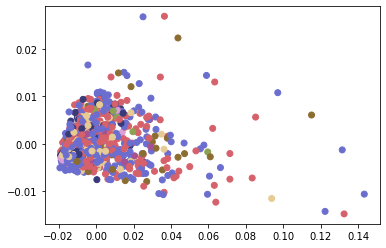

In [70]:
X = df[['Risk','Sex', 'Job', 'Age', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration']]
Y = df['Purpose']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
RFC = RandomForestClassifier()
rfc = RFC.fit(X_train, y_train)

y_pred = RFC.predict(X)

X1 = normalize(X)
X_ = PCA(n_components = 2).fit_transform(X1, 2)

plt.scatter(X_[:,0], X_[:,1], c = y_pred, cmap = 'tab20b')
plt.show()

Эксперимент с другим алгоритмом t-SNE.

In [71]:
X1 = normalize(X)
X_= TSNE(n_components = 2, init = 'pca').fit_transform(X1, 2)

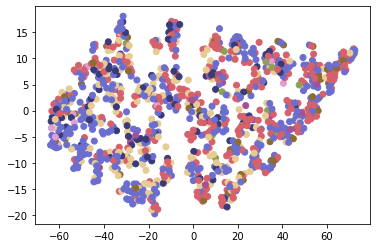

In [72]:
plt.scatter(X_[:,0], X_[:,1], c = y_pred, cmap = 'tab20b')

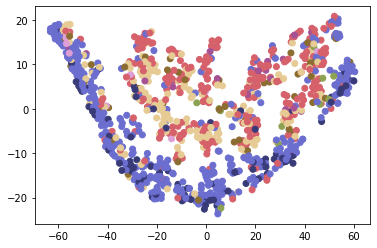

In [74]:
X = df[['Risk','Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose']]
Y = df['Age']
X1 = normalize(X)
X_= TSNE(n_components = 2, init = 'pca').fit_transform(X1, 2)
plt.scatter(X_[:,0], X_[:,1], c = y_pred, cmap = 'tab20b')

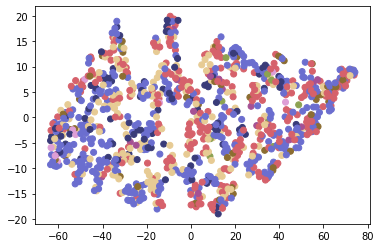

In [73]:
X = df[['Risk','Age', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose']]
Y = df['Sex']
X1 = normalize(X)
X_= TSNE(n_components = 2, init = 'pca').fit_transform(X1, 2)
plt.scatter(X_[:,0], X_[:,1], c = y_pred, cmap = 'tab20b')

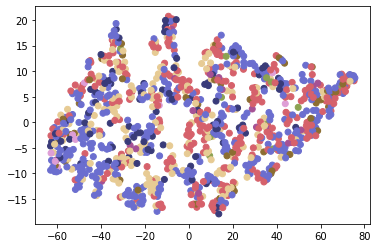

In [75]:
X = df[['Risk','Sex', 'Age', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose']]
Y = df['Job']
X1 = normalize(X)
X_= TSNE(n_components = 2, init = 'pca').fit_transform(X1, 2)
plt.scatter(X_[:,0], X_[:,1], c = y_pred, cmap = 'tab20b')

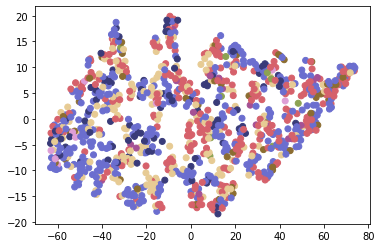

In [76]:
X = df[['Risk','Sex', 'Job', 'Age', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose']]
Y = df['Housing']
X1 = normalize(X)
X_= TSNE(n_components = 2, init = 'pca').fit_transform(X1, 2)
plt.scatter(X_[:,0], X_[:,1], c = y_pred, cmap = 'tab20b')

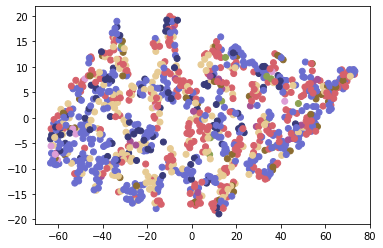

In [77]:
X = df[['Risk','Sex', 'Job', 'Age', 'Housing', 'Checking account', 'Credit amount', 'Duration', 'Purpose']]
Y = df['Saving accounts']

X1 = normalize(X)
X_= TSNE(n_components = 2, init = 'pca').fit_transform(X1, 2)
plt.scatter(X_[:,0], X_[:,1], c = y_pred, cmap = 'tab20b')

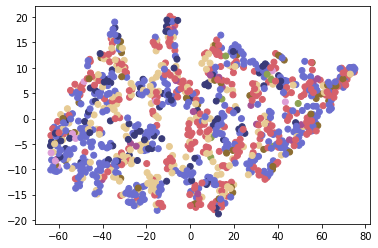

In [78]:
X = df[['Risk','Sex', 'Job', 'Age', 'Housing', 'Saving accounts', 'Credit amount', 'Duration', 'Purpose']]
Y = df['Checking account']

X1 = normalize(X)
X_= TSNE(n_components = 2, init = 'pca').fit_transform(X1, 2)
plt.scatter(X_[:,0], X_[:,1], c = y_pred, cmap = 'tab20b')

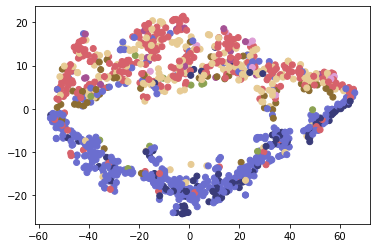

In [79]:
X = df[['Risk','Sex', 'Job', 'Age', 'Housing', 'Saving accounts', 'Checking account', 'Duration', 'Purpose']]
Y = df['Credit amount']

X1 = normalize(X)
X_= TSNE(n_components = 2, init = 'pca').fit_transform(X1, 2)
plt.scatter(X_[:,0], X_[:,1], c = y_pred, cmap = 'tab20b')

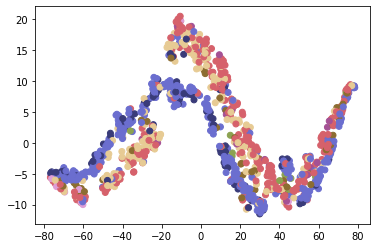

In [80]:
X = df[['Risk','Sex', 'Job', 'Age', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Purpose']]
Y = df['Duration']

X1 = normalize(X)
X_= TSNE(n_components = 2, init = 'pca').fit_transform(X1, 2)
plt.scatter(X_[:,0], X_[:,1], c = y_pred, cmap = 'tab20b')

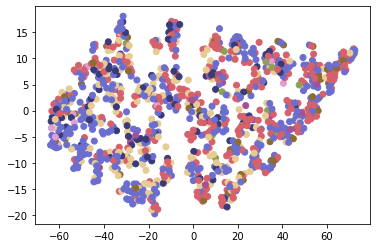

In [81]:
X = df[['Risk','Sex', 'Job', 'Age', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration']]
Y = df['Purpose']

X1 = normalize(X)
X_= TSNE(n_components = 2, init = 'pca').fit_transform(X1, 2)
plt.scatter(X_[:,0], X_[:,1], c = y_pred, cmap = 'tab20b')